# Collegedunia -  Data Analysis Assesment

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
from sklearn.impute import KNNImputer
from geopy.distance import geodesic


# Product Performance Analysis: Explore products.csv to analyse product performance, including costs, categories, and popularity.

In [20]:
product = pd.read_csv('./data/products.csv')
inventory_items = pd.read_csv('./data/inventory_items.csv')
product.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [21]:
product.shape

(29120, 9)

In [22]:
product.describe()

,id,cost,retail_price,distribution_center_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.000000,0.008300,0.020000,1.000000
25%,7280.750000,11.275613,24.000000,2.000000
50%,14560.500000,19.675081,39.990002,5.000000
75%,21840.250000,34.440000,69.949997,8.000000
max,29120.000000,557.151002,999.000000,10.000000


In [23]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [24]:
product.isnull().sum() * 100/len(product)

id                        0.000000
cost                      0.000000
category                  0.000000
name                      0.006868
brand                     0.082418
retail_price              0.000000
department                0.000000
sku                       0.000000
distribution_center_id    0.000000
dtype: float64

In [25]:
## Since the null value perccentage is negligible , imputing it with mode
brand_mode = product['brand'].mode()[0]
product['brand'].fillna(brand_mode,inplace = True)

In [26]:
## Dropping rows with namecolumn with null values
product.dropna(subset=['name'],inplace = True)

In [27]:
product.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [28]:
product.isnull().sum() * 100/len(product)

id                        0.0
cost                      0.0
category                  0.0
name                      0.0
brand                     0.0
retail_price              0.0
department                0.0
sku                       0.0
distribution_center_id    0.0
dtype: float64

In [29]:
product['category'].unique(),product['category'].nunique()

(array(['Accessories', 'Plus', 'Swim', 'Active', 'Socks & Hosiery',
        'Socks', 'Dresses', 'Pants & Capris',
        'Fashion Hoodies & Sweatshirts', 'Skirts', 'Blazers & Jackets',
        'Suits', 'Tops & Tees', 'Sweaters', 'Shorts', 'Jeans', 'Maternity',
        'Sleep & Lounge', 'Suits & Sport Coats', 'Pants', 'Intimates',
        'Outerwear & Coats', 'Underwear', 'Leggings',
        'Jumpsuits & Rompers', 'Clothing Sets'], dtype=object),
 26)

In [30]:
product['brand'].nunique()

2756

In [31]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [32]:
product['department'].unique()

array(['Women', 'Men'], dtype=object)

In [33]:
product['department'].value_counts()

Women    15988
Men      13130
Name: department, dtype: int64

In [34]:
merged_df2 = pd.merge(inventory_items, product, left_on='product_id', right_on='id', suffixes=('_inv', '_prod'))

# Select relevant columns and drop duplicate 'id' column
merged_df2 = merged_df2[['id_inv', 'product_id', 'created_at', 'sold_at', 'cost_inv', 'product_category', 'product_name', 'product_brand', 'product_retail_price', 'product_department', 'product_sku', 'product_distribution_center_id', 'category', 'name', 'brand', 'retail_price', 'department', 'sku', 'distribution_center_id']]
merged_df2 = merged_df2.rename(columns={'cost': 'product_cost'})


In [35]:
merged_df2.drop(['category','retail_price','department','sku','distribution_center_id','name','brand'],axis = 1,inplace = True)

In [36]:
merged_df2.head()

,id_inv,product_id,created_at,sold_at,cost_inv,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [37]:
inventory_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490702,451085,25590,2020-11-20 05:55:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3


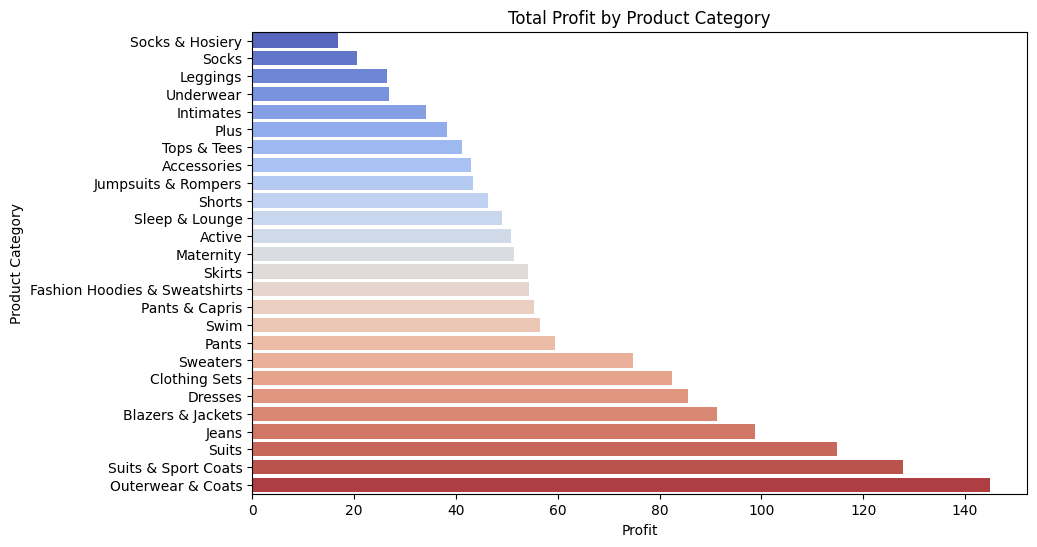

In [38]:
average_product_retail_price = merged_df2.groupby('product_category')['product_retail_price'].mean().reset_index().sort_values(by = 'product_retail_price')
plt.figure(figsize=(10, 6))
sns.barplot(y='product_category', x='product_retail_price', data=average_product_retail_price, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

## Volumn of product in inventory by category

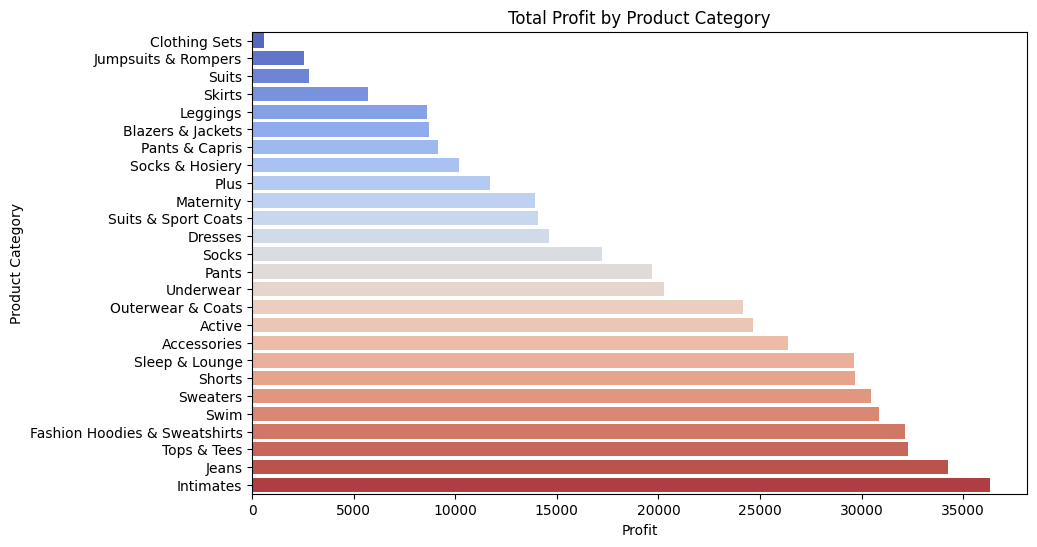

In [39]:
average_product_retail_price = merged_df2.groupby('product_category')['product_retail_price'].count().reset_index().sort_values(by = 'product_retail_price')
plt.figure(figsize=(10, 6))
sns.barplot(y='product_category', x='product_retail_price', data=average_product_retail_price, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

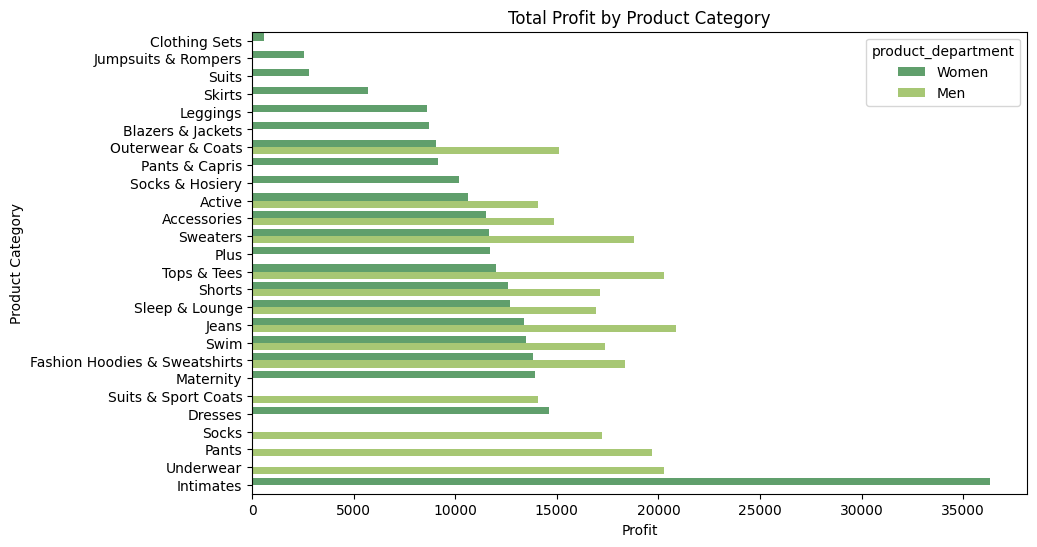

In [40]:
average_product_retail_price = merged_df2.groupby(['product_category','product_department'])['product_retail_price'].count().reset_index().sort_values(by = 'product_retail_price')
plt.figure(figsize=(10, 6))
sns.barplot(y='product_category', x='product_retail_price',hue = 'product_department', data=average_product_retail_price, palette='summer')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()